# Download the data

In [2]:
import os
import tarfile
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close() 

In [3]:
import pandas as pd 

def load_housing_data(housing_path = HOUSING_PATH):
    fetch_housing_data()
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

# Quick look at the data structure

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\plotting\_matpl

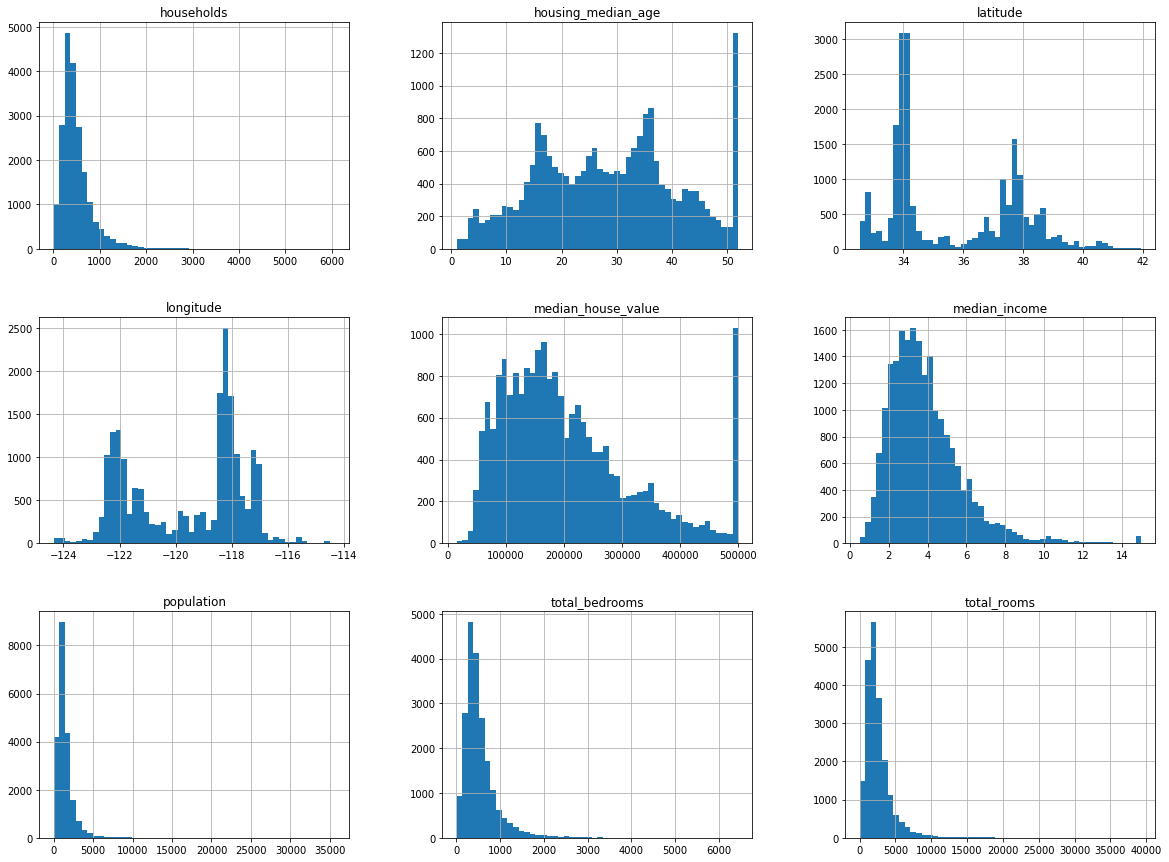

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Create Test Set

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


# Hash on each instance identifier. To make sure that test set instances are new.

In [11]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [12]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index()#add index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# Use latitude and longitude as an unique Id

In [14]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

# Using sckit-learn to split the dataset

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size= 0.2, random_state = 42)

# Create income category attribute with five categories

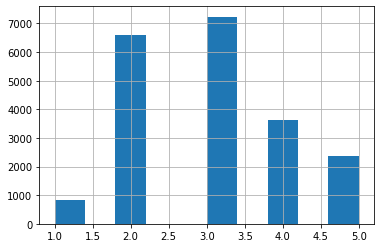

In [16]:
housing['income_cat'] = pd.cut(housing["median_income"], bins = [0.,1.5,3.0,4.5,6., np.inf], labels = [1,2,3,4,5])
housing['income_cat'].hist()

# Stratisfied sampling based on income

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state =42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
#view the distribution on income_Cat in test set
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [19]:
#Remove income cap to make the data back to orginial
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace= True)

# Discovering and Visualizing the Data to Gain Insights

In [20]:
# create a copy of train set
housing = strat_train_set.copy()

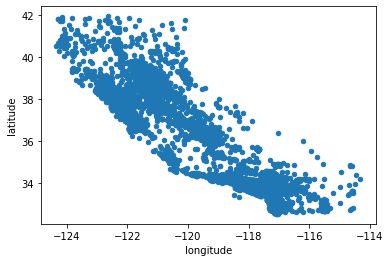

In [21]:
#Visualizing Geographic data
housing.plot(kind= 'scatter', x = 'longitude', y='latitude')

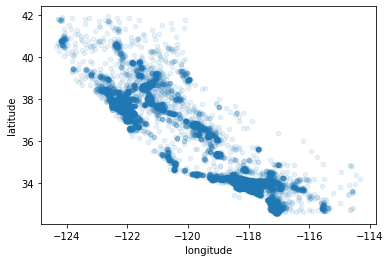

In [22]:
# To visualize higher density data point
housing.plot(kind= 'scatter', x = 'longitude', y='latitude', alpha =0.1)

High density area are Bay Area, los Angeles and San Diego, long line of fairly high density in central valley

C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\plotting\_matpl

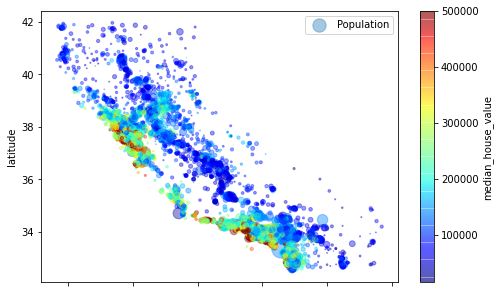

In [23]:
# add radius of each circle represents districts population, color represents prices using jet
housing.plot(kind= 'scatter', x = 'longitude', y='latitude', alpha =0.4, s =housing["population"]/100, label = 'Population',
            figsize=(8,5), c='median_house_value', cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [24]:
# Looking for correlation
corr_matrix = housing.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

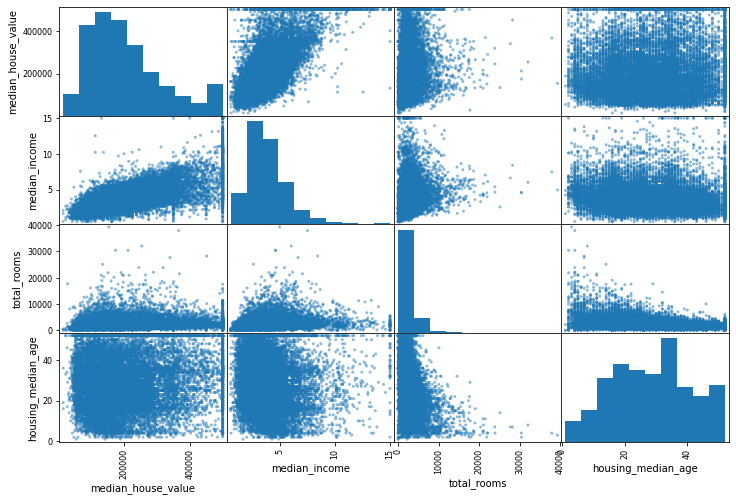

In [31]:
# visualizing correlation between the attributes
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize= (12,8))
plt.show()

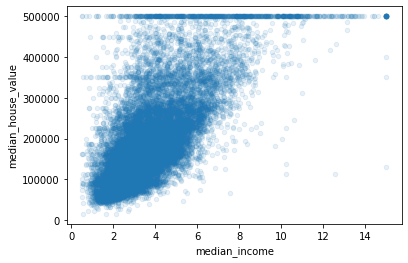

In [33]:
# lets see correlation between median_housing_value to median income

housing.plot(kind ='scatter', x = 'median_income', y='median_house_value', alpha = 0.1)

Strong correlation.

# Experimenting with Attribute Combinations.

 - total number of rooms is not useful if you dont know how many households there are.
 - total number of bedrooms may not be useful with knowing number of rooms.
 - population per household may be useful

In [34]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] =housing['population'] /housing['households']

In [35]:
# correlation matrix
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending =False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the data for machine learning Algorithm

In [36]:
# clean training set
#separate the predictors and the labels
housing = strat_train_set.drop('median_house_value', axis =1)
housing_labels = strat_train_set['median_house_value'].copy()

# Data Cleaning

Total  bedrooms contains missing values. Suggested method
 - Get rid of missing values
 - Get rid of whole attributes
 - set the values to some attributes.

In [37]:
# using scikit -learn for 3rd option
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

When the model goes live we can have missing values in other numeric attributes. So create a copy of data without the text attribute ocean_proximity

In [38]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [39]:
#fit the imputer instance on the data 
imputer.fit(housing_num)
#display median of each attribute by using statistics_ instance
print(imputer.statistics_)
print(housing_num.median().values)
# Use trainied imputer to transform the data by replacing values with the learned median.
X = imputer.transform(housing_num)
# output from transform is numpy array. we need to put it back into pandas dataframe.
housing_dr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

# Handling Text  and Categorical Attributes

In [40]:
# ocean_proximity is a text variable
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [41]:
# Machine learning algorithms works better with numbers.
# So lets encode it using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoder[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

ML assumes that two nearby values are more similar than two distinct values. OrdinalEncoder are good while working with data with categorical values such as bad,average, good.

In [43]:
# one-hot encoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [45]:
#outputs a scipy sparse matrix. It is useful for large data set
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Custom Transformers

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributs = attr_adder.transform(housing.values)

# Feature Scaling

In [66]:
#Transformation pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

# Select and Train a Model

In [68]:
#linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# predict on few training instance
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predicted :", lin_reg.predict(some_data_prepared))
print("labels:", list(some_labels))

predicted : [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [70]:
# measure the RMSE on the regression model
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [72]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_prediction = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_prediction))
tree_rmse

0.0

Strange result can be due to overfitting. use cross- validation to verify it.

In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("scores",scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

scores [68669.56161158 67743.99435993 70676.82381106 70029.12888555
 69944.2634288  72983.97661848 71796.02229906 71317.73943846
 78157.3458854  69841.85661359]
mean: 71116.07129519118
standard deviation: 2744.067654655039


In [78]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_prediction = forest_reg.predict(housing_prepared)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


scores [51827.22686823 50214.32484037 51709.31630577 52653.78772716
 53077.51484682 56561.80774636 52174.52310142 51528.18824457
 54911.08321326 53744.52014947]
mean: 52840.22930434249
standard deviation: 1743.918510885494


# Fine tune the model 

In [81]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
             {'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,3,4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring ='neg_mean_squared_error', return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [82]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [87]:
cvres = grid_search.cv_results_

for mean_score , params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63737.02905542821 {'max_features': 2, 'n_estimators': 3}
55195.963337704685 {'max_features': 2, 'n_estimators': 10}
52909.39127586074 {'max_features': 2, 'n_estimators': 30}
60449.15787740307 {'max_features': 4, 'n_estimators': 3}
52409.81293289964 {'max_features': 4, 'n_estimators': 10}
50789.52039827995 {'max_features': 4, 'n_estimators': 30}
59207.899241930514 {'max_features': 6, 'n_estimators': 3}
52211.8560710333 {'max_features': 6, 'n_estimators': 10}
49939.86181732238 {'max_features': 6, 'n_estimators': 30}
58868.29600704469 {'max_features': 8, 'n_estimators': 3}
52172.489143215666 {'max_features': 8, 'n_estimators': 10}
50179.30889611335 {'max_features': 8, 'n_estimators': 30}
62660.696042182135 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54101.283122156616 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60123.33524785009 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52657.70823683461 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [89]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis =1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(y_test,final_prediction))


47974.213795127485

# Evaluate your System on the test set

In [90]:
final_rmse

47974.213795127485

compute 95% confidence

In [93]:
from scipy import stats
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([46006.00260853, 49864.79822986])